In [5]:
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime
import numpy as np

In [6]:
all_df = pd.read_json('https://retail-sales-data.herokuapp.com/alldata')

In [7]:
all_df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02-28,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02-20,80712190438,94108.0
2,1981-08-06 00:00:00.000000,M,01-01,3,1229,S,Flagship store,387.135,Las Vegas,3.0,...,2,Clothing,1,Women,1,Nevada,4074.135,2013-12-16,18505840838,89107.0
3,1986-10-13 00:00:00.000000,M,01-01,-4,-284,R,Flagship store,119.280,Denver,1.0,...,3,Clothing,1,Women,1,Colorado,-1255.280,2013-08-16,92814475704,80202.0
4,1986-10-13 00:00:00.000000,M,01-01,4,284,S,Flagship store,119.280,Denver,1.0,...,4,Clothing,1,Women,1,Colorado,1255.280,2013-08-07,92814475704,80202.0


In [20]:
all_df['tran_date'] = pd.to_datetime(all_df['tran_date'], format='%Y-%m-%d')
all_df['tran_date'] = all_df['tran_date'].dt.strftime('%Y-%m')
all_df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02,80712190438,94108.0
2,1981-08-06 00:00:00.000000,M,01-01,3,1229,S,Flagship store,387.135,Las Vegas,3.0,...,2,Clothing,1,Women,1,Nevada,4074.135,2013-12,18505840838,89107.0
3,1986-10-13 00:00:00.000000,M,01-01,-4,-284,R,Flagship store,119.280,Denver,1.0,...,3,Clothing,1,Women,1,Colorado,-1255.280,2013-08,92814475704,80202.0
4,1986-10-13 00:00:00.000000,M,01-01,4,284,S,Flagship store,119.280,Denver,1.0,...,4,Clothing,1,Women,1,Colorado,1255.280,2013-08,92814475704,80202.0


In [50]:
df = all_df[all_df['Store_type'] == 'TeleShop']
df

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
7,1989-12-24 00:00:00.000000,M,01-01,1,1122,S,TeleShop,117.810,Miami,8.0,...,7,Clothing,1,Women,1,Florida,1239.810,2012-02,90501340928,33127.0
23,1992-03-02 00:00:00.000000,M,01-01,5,595,S,TeleShop,312.375,NewYork,6.0,...,23,Clothing,1,Women,1,NewYork,3287.375,2014-02,57134739558,10007.0
24,1992-03-02 00:00:00.000000,M,01-01,5,1371,S,TeleShop,719.775,NewYork,6.0,...,24,Clothing,1,Women,1,NewYork,7574.775,2012-06,42584381402,10007.0
26,1979-04-23 00:00:00.000000,M,01-01,3,883,S,TeleShop,278.145,San Fransisco,5.0,...,26,Clothing,1,Women,1,California,2927.145,2012-02,85259567157,94108.0
41,1989-03-10 00:00:00.000000,F,01-01,5,1351,S,TeleShop,709.275,Boston,4.0,...,41,Clothing,1,Women,1,Massachucetts,7464.275,2011-03,47028152482,2113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23021,1970-08-23 00:00:00.000000,F,04-04,1,1340,S,TeleShop,140.700,NewYork,6.0,...,23021,Bags,4,Women,4,NewYork,1480.700,2011-12,97556034600,10007.0
23023,1984-09-12 00:00:00.000000,M,04-04,4,770,S,TeleShop,323.400,Las Vegas,3.0,...,23023,Bags,4,Women,4,Nevada,3403.400,2011-12,60639526665,89107.0
23025,1974-03-12 00:00:00.000000,M,04-04,5,917,S,TeleShop,481.425,Miami,8.0,...,23025,Bags,4,Women,4,Florida,5066.425,2011-03,91063606298,33127.0
23026,1987-03-15 00:00:00.000000,M,04-04,2,1292,S,TeleShop,271.320,Denver,1.0,...,23026,Bags,4,Women,4,Colorado,2855.320,2011-11,47899954282,80202.0


In [47]:
df = all_df[all_df['prod_cat'] == 'Clothing']
df = df.loc[:,['tran_date','Qty']].groupby('tran_date', as_index=False)['Qty'].sum()
df.head()

,tran_date,Qty
0,2011-01,29
1,2011-02,121
2,2011-03,215
3,2011-04,158
4,2011-05,169


In [28]:
# eshop_df['tran_date'] = to_datetime(eshop_df['tran_date'])
# # eshop_df['tran_date'] = eshop_df['tran_date'].dt.to_period('M')
# eshop_df.head()
# eshop_df['ds'] = eshop_df.index
df.dtypes

tran_date    object
Qty           int64
dtype: object

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2013-01-01  61.246145   48.134933   74.645420
1 2013-02-01  54.012903   41.634325   68.565630
2 2013-03-01  66.980308   52.795895   80.182392
3 2013-04-01  87.006118   72.578851  101.488241
4 2013-05-01  75.596915   62.407210   90.240883


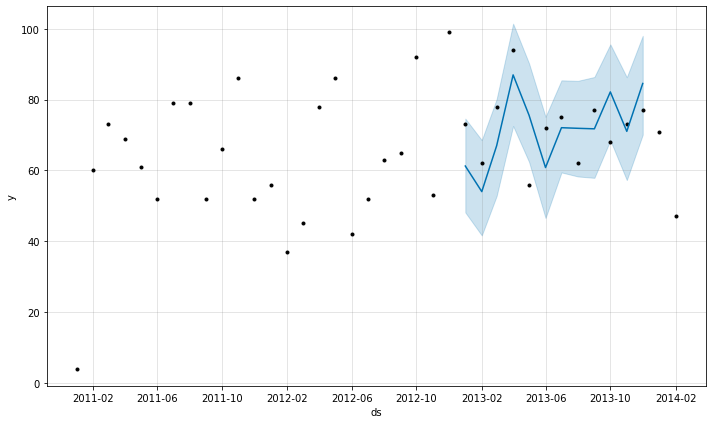

In [29]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2013-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


           ds   y
21 2012-10-01  92
22 2012-11-01  53
23 2012-12-01  99
24 2013-01-01  73
25 2013-02-01  62
MAE: 14.531


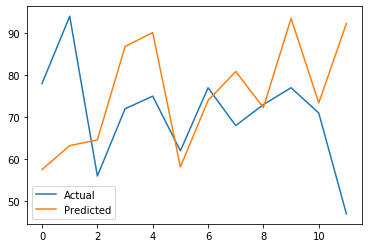

In [30]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2013-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()